# BATEMAN’S EQUATIONS: CHAIN OF DECAYS OF 3 NUCLEAR SPECIES

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams; rcParams["figure.dpi"] = 300
from matplotlib.ticker import (AutoMinorLocator)
plt.style.use('seaborn-bright')
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

You will be examining properties of the Bateman equations that govern the decay of multiple nuclear species. While the problem is exactly solvable in iterative form we will consider it as a coupled system of equations, to determine the co-evolution of all species. It is well known that if there is only one nuclear species A the number of radioactive decays is proportional to the number of radioactive nuclei, $N_A$, i.e., the species evolves according to the ordinary differential equation (ODE). <br>
$$\begin{equation}
\tag{1}
\begin{split}
\frac{dN_A}{dt} &= -\lambda_{A}N_A
\end{split}
\end{equation}$$ <br>
where $\lambda_A$ is related to the half-life of the species $A_{t_{1/2},A} = ln(2/\lambda_A)$ <br>
Now consider the case of a chain of two decays: one nucleus A decays into another B by one process, then B decays
into another C by a new process. The previous equation cannot be applied to the decay chain. Since A decays into B, and B decays into C, the activity of A adds to the total number of B nuclei. Therefore, the number of second generation nuclei B increases as a result of the decay of first generation A nuclei, and decreases as a result of its own decay into the third generation nuclei C, thus, the B species evolves as, <br>
$$\begin{equation}
\tag{2}
\begin{split}
\frac{dN_B}{dt} &= -\lambda_{B}N_B + \lambda_{A}N_A
\end{split}
\end{equation}$$ <br>
We will now treat a more interesting possibility, where we have 3 radioactive species, the first generation A decays into second generation B and C. For example, $^{40}K$ has a 89.3% probability of decaying to $^{40}Ca$, and 10.7% to $^{40}Ar$. To make the problem more fun we will add the possibility that species B can, too, decay into species C. We will also consider that C decays into stable nuclei D. Based on the above considerations we have: <br>
$$\begin{equation}
\tag{3}
\begin{split}
\frac{dN_A}{dt} &= -\lambda_{A}N_A \\
\frac{dN_B}{dt} &= -\lambda_{B}N_B + \lambda_{A,B}N_A \\
\frac{dN_C}{dt} &= -\lambda_{C}N_C + \lambda_{A,C}N_A + \lambda_{B}N_B \\
\frac{dN_D}{dt} &= \lambda_{C}N_C
\end{split}
\end{equation}$$ <br>
where $\lambda_{A,B} + \lambda_{A,C} = \lambda_{A}$, and $\lambda_{A,B}/\lambda_{A,C}$ must equal the ratio of the probability that A will decay into B to the probability that A will decay into C. <br>
This system of equations has an integral (constant) of the motion, <br>
$$\begin{equation}
\tag{4}
\begin{split}
N = N_A + N_B + N_C + N_D
\end{split}
\end{equation}$$ <br>
which is the total number of nuclei and is determined by the initial conditions. <br>
The system (3) has multiple timescales involved, and hence it is not possible to completely non-dimensionalize it.
In addition, use N to introduce normalized species numbers $\tilde N_{i} = N_{i}/N$, i = A,B,C,D, so that the final equations in dimensionless time describe the evolution of the fraction of each species in an initial sample. This way the constant of the motion becomes, <br>
$$\begin{equation}
\tag{5}
\begin{split}
 \tilde N_{A} + \tilde N_{B} + \tilde N_{C} + \tilde N_{D} = \tilde N = 1
\end{split}
\end{equation}$$ <br>
This constant $\tilde N$ will allow you to validate the quality of the numerical integration of Eq. (3). <br>
Show in your term paper the derivation of the the normalized and dimensionless version of (3). To solve this normalized and dimensionless version of (3) you will need to specify initial conditions. Do the following:

### ***QUESTIONS***

**1)** Use RK4 to integrate numerically the dimensionless and normalized version the ODE (3) from t = 0 forward in time and for sufficiently large t until the populations of each species settles. You will need to be plotting $\tilde N_{i}$ vs $t$ to see if the solution is settling and to determine when to stop the integration. Run a couple of numerical experiments with different parameters to test the dynamics of the species populations.

Use your judgement as to how small a step size you need to solve this system accurately. If you cannot figure this out from pure thought, experiment with different step sizes and use $\delta \tilde N = |(\tilde N(t) - \tilde N(t=0))/\tilde N(t=0)|$ to determine this accuracy. If $\delta\tilde N$ is smaller than $10^{-3}$ for all integration times, then you have a decent accuracy.

**1)** Use RK4 to integrate numerically the dimensionless and normalized version the ODE (3) from t = 0 forward in time and for sufficiently large t until the populations of each species settles. You will need to be plotting $\tilde N_{i}$ vs $t$ to see if the solution is settling and to determine when to stop the integration. Run a couple of numerical experiments with different parameters to test the dynamics of the species populations.

## Tools for Numerical Integration 

In [2]:
# Define the RK4 Step (Taken from Class)
def RK4(RHS,y0,t,h,*P):
    """
    Implements a single step of a fourth-order, explicit Runge-Kutta scheme
    """
    thalf = t + 0.5*h
    k1 = h*RHS(y0, t, *P)
    k2 = h*RHS(y0+0.5*k1, thalf, *P)
    k3 = h*RHS(y0+0.5*k2, thalf, *P)
    k4 = h*RHS(y0+k3, t+h, *P)
    return y0 + (k1 + 2*k2 + 2*k3 + k4)/6

# Define the ODESolver (Taken from Class)
def odeSolve(t0, y0, tmax, h, RHS, method, *P):
    """
    ODE driver with constant step-size, allowing systems of ODE's
    """
    # make array of times and find length of array
    t = np.arange(t0,tmax+h,h)
    ntimes,  = t.shape
    # find out if we are solving a scalar ODE or a system of ODEs, and allocate space accordingly
    if type(y0) in [int, float]:  # check if primitive type -- means only one eqn
        neqn = 1
        y = np.zeros(ntimes)
    else:                         # otherwise assume a numpy array -- a system of more than one eqn
        neqn, = y0.shape
        y = np.zeros((ntimes, neqn))
    # set first element of solution to initial conditions (possibly a vector)
    y[0] = y0
    # march on...
    for i in range(0,ntimes-1):
        y[i+1] = method(RHS,y[i],t[i],h,*P)
    return t,y

## RHS for the 4 Coupled Autonomous Linear ODEs

In [3]:
# Define the RHS 
def nuclear_species_RHS(y,t,*P):    
    lambda_B, lambda_AB, lambda_C, lambda_AC = P ## Unpack Parameters
    NA = y[0]
    NB = y[1]
    NC = y[2]
    ND = y[3]
    dNA_dt = -NA
    dNB_dt = -lambda_B*NB + lambda_AB*NA
    dNC_dt = -lambda_C*NC + lambda_AC*NA + lambda_B*NB
    dND_dt = lambda_C*NC
    array = np.array([dNA_dt, dNB_dt, dNC_dt, dND_dt])
    return array

### CASE 1: Species A decays very SLOWLY 
***
First, consider the case where the A species decays very slowly and test whether it is possible to run out of B and C nuclei. For this experiment you will set $\lambda_{B}/\lambda_{A}$ = 5, $\lambda_{C}/\lambda_{A}$ = 10, $\lambda_{A,B}/\lambda_{A}$ = 0.85 and $\lambda_{A,C}/\lambda_{A}$ = 0.15. Consider initial conditions $\tilde N_{A}$ = 0.5, $\tilde N_{B}$ = 0.25, $\tilde N_{C}$ = 0.1, $\tilde N_{D}$ = 0.15. <br>
Show plots of your solution for $\tilde N_{i}$ v/s t.  <br>
**QUESTION:** Does this evolution eliminate the species A and B completely?

In [4]:
# Initial Conditions
t0 = 0.0
y0 = np.array([0.5, 0.25, 0.1, 0.15])
tmax = 10
h = 0.0001

# Parameters
lambda_B = 5.0 
lambda_AB = 0.85
lambda_C = 10.0 
lambda_AC = 0.15

# Solve the IVP
t,y = odeSolve(t0, y0, tmax, h, nuclear_species_RHS, RK4, lambda_B, lambda_AB, lambda_C, lambda_AC)

# dN Analysis
Nm = np.array([y[:,0],y[:,1],y[:,2],y[:,3]])
N = Nm.sum(axis=0)
Ne = N - 1

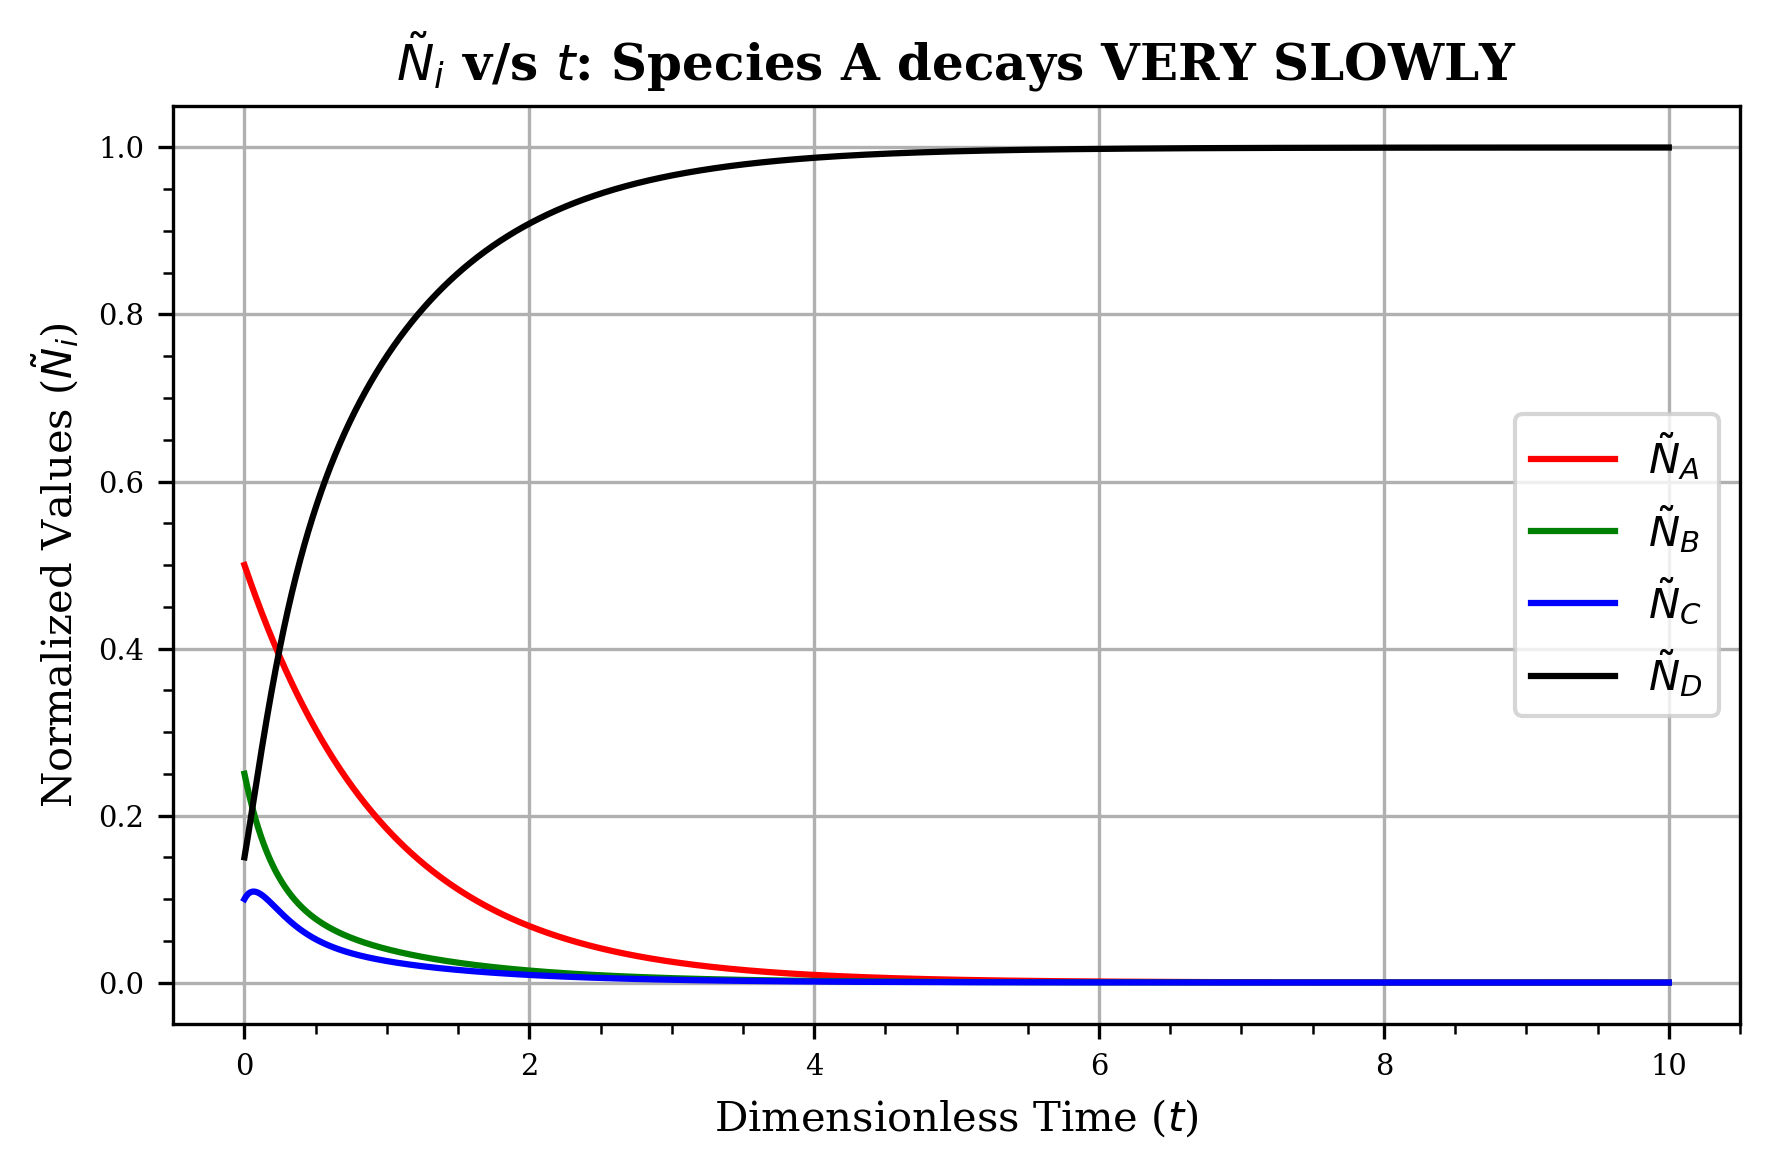

In [5]:
# Plot Normalized Values v/s Dimensionless Time
f,a = plt.subplots()
a.plot(t,y[:,0],'r', label=r'$\tilde N_{A}$')
a.plot(t,y[:,1],'g', label=r'$\tilde N_{B}$')
a.plot(t,y[:,2],'b', label=r'$\tilde N_{C}$')
a.plot(t,y[:,3],'k', label=r'$\tilde N_{D}$')    
a.set_xlabel(r'Dimensionless Time ($t$)')
a.set_ylabel(r'Normalized Values ($\tilde N_{i}$)')
a.set_title(r'$\tilde N_{i}$ v/s $t$: Species A decays VERY SLOWLY', fontweight='bold')
a.xaxis.set_minor_locator(AutoMinorLocator()) 
a.yaxis.set_minor_locator(AutoMinorLocator())
a.tick_params(which='minor', length=2.5, color='k')
a.legend()
a.grid()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


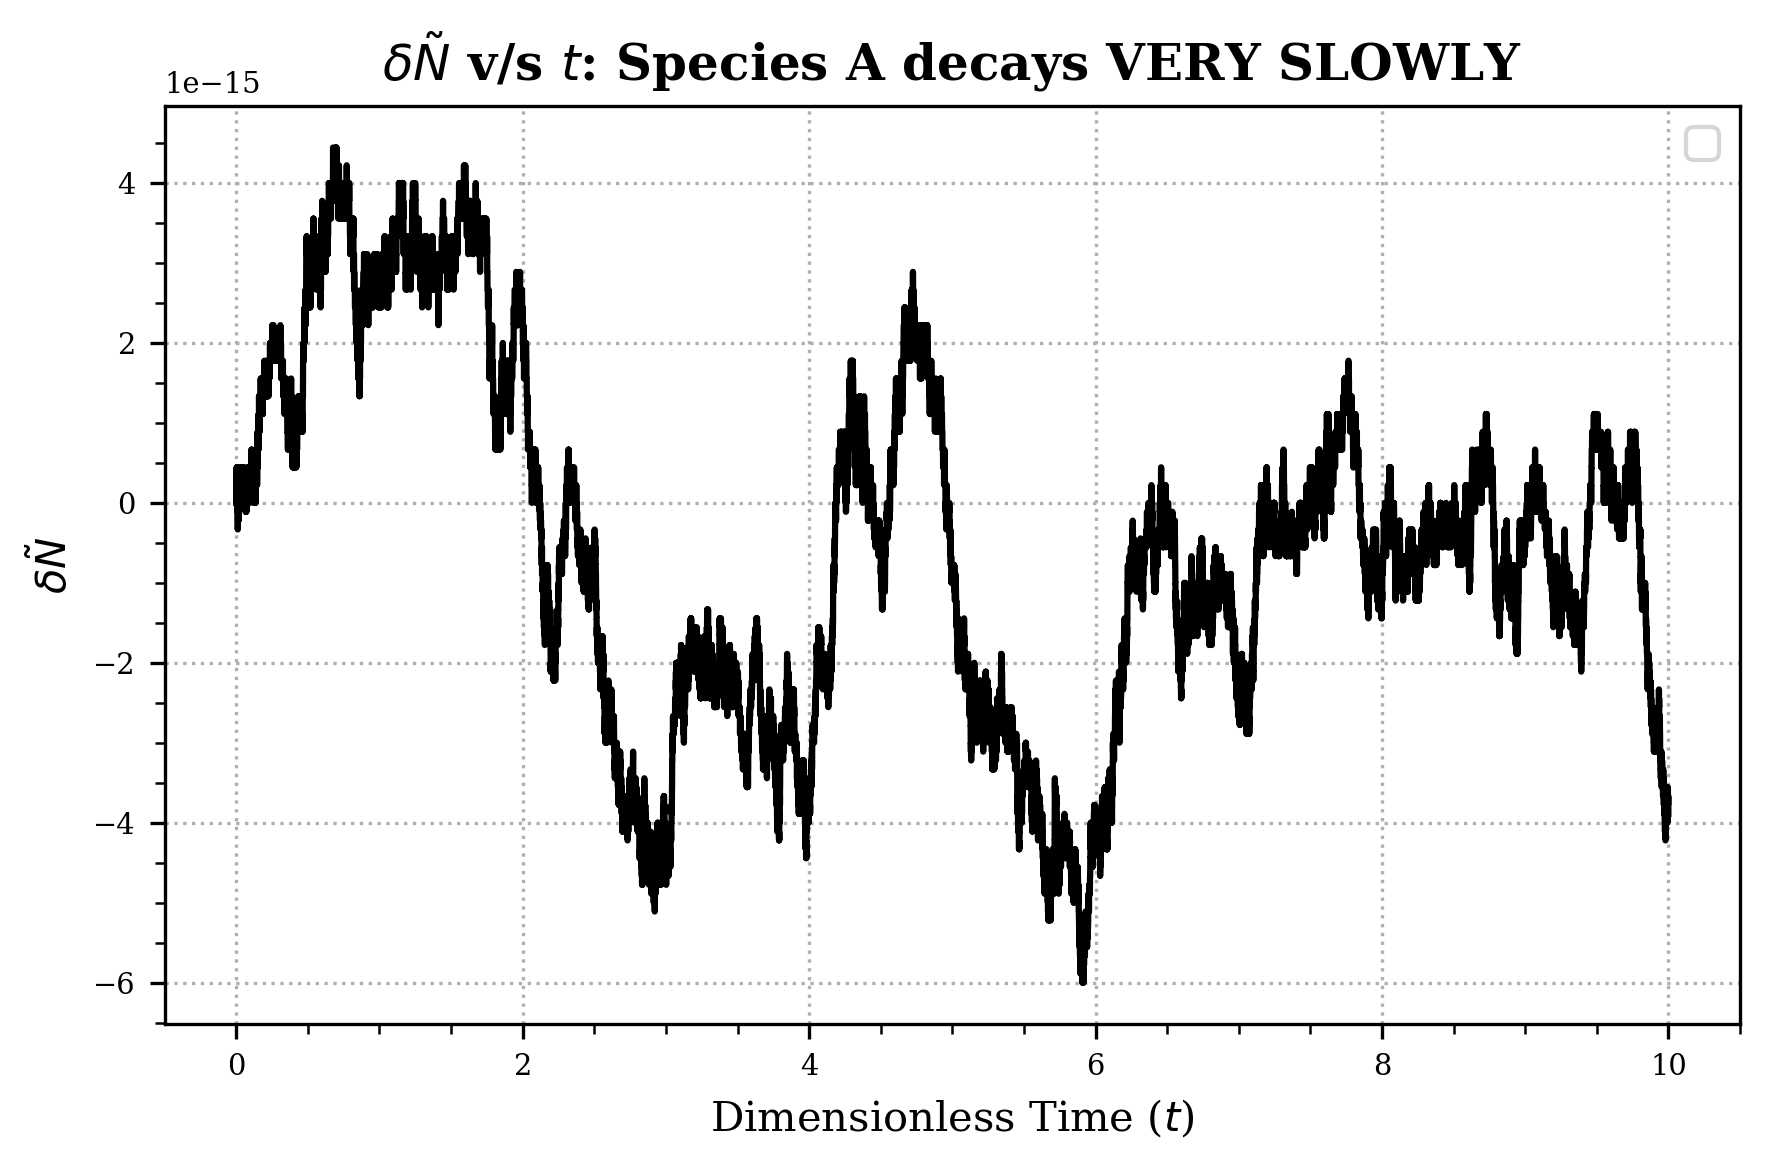

In [15]:
# Plot dN v/s Dimensionless Time
f,a = plt.subplots()
a.plot(t,Ne,'k')    
a.set_xlabel(r'Dimensionless Time ($t$)')
a.set_ylabel(r'$\delta \tilde N$')
a.set_title(r'$\delta \tilde N$ v/s $t$: Species A decays VERY SLOWLY', fontweight='bold')
a.xaxis.set_minor_locator(AutoMinorLocator()) 
a.yaxis.set_minor_locator(AutoMinorLocator())
a.tick_params(which='minor', length=2.5, color='k')
a.grid(linestyle=':')
plt.tight_layout()
plt.show()

### CASE 2 : Species A decays very RAPIDLY
***
Second, consider the case where the A species decays very rapidly. For this experiment you will set $\lambda_{B}/\lambda_{A}$ = 0.05, $\lambda_{C}/\lambda_{A}$ = 0.1, $\lambda_{A,B}/\lambda_{A}$ = 0.85 and $\lambda_{A,C}/\lambda_{A}$ = 0.15. Consider initial conditions $\tilde N_{A}$ = 0.5, $\tilde N_{B}$ = 0.25, $\tilde N_{C}$ = 0.1, $\tilde N_{D}$ = 0.15. <br>
Show plots of your solution for $\tilde N_{i}$ v/s t.  <br>
**QUESTION:** How is this evolution different from the previous one?

In [16]:
# Initial Conditions
t0 = 0.0
y0 = np.array([0.5, 0.25, 0.1, 0.15])
tmax = 120
h = 0.0001

# Parameters
lambda_B = 0.05 
lambda_AB = 0.85
lambda_C = 0.1 
lambda_AC = 0.15

# Solve the IVP
t,y = odeSolve(t0, y0, tmax, h, nuclear_species_RHS, RK4, lambda_B, lambda_AB, lambda_C, lambda_AC)

# dN Analysis
Nm = np.array([y[:,0],y[:,1],y[:,2],y[:,3]])
N = Nm.sum(axis=0)
Ne = N - 1

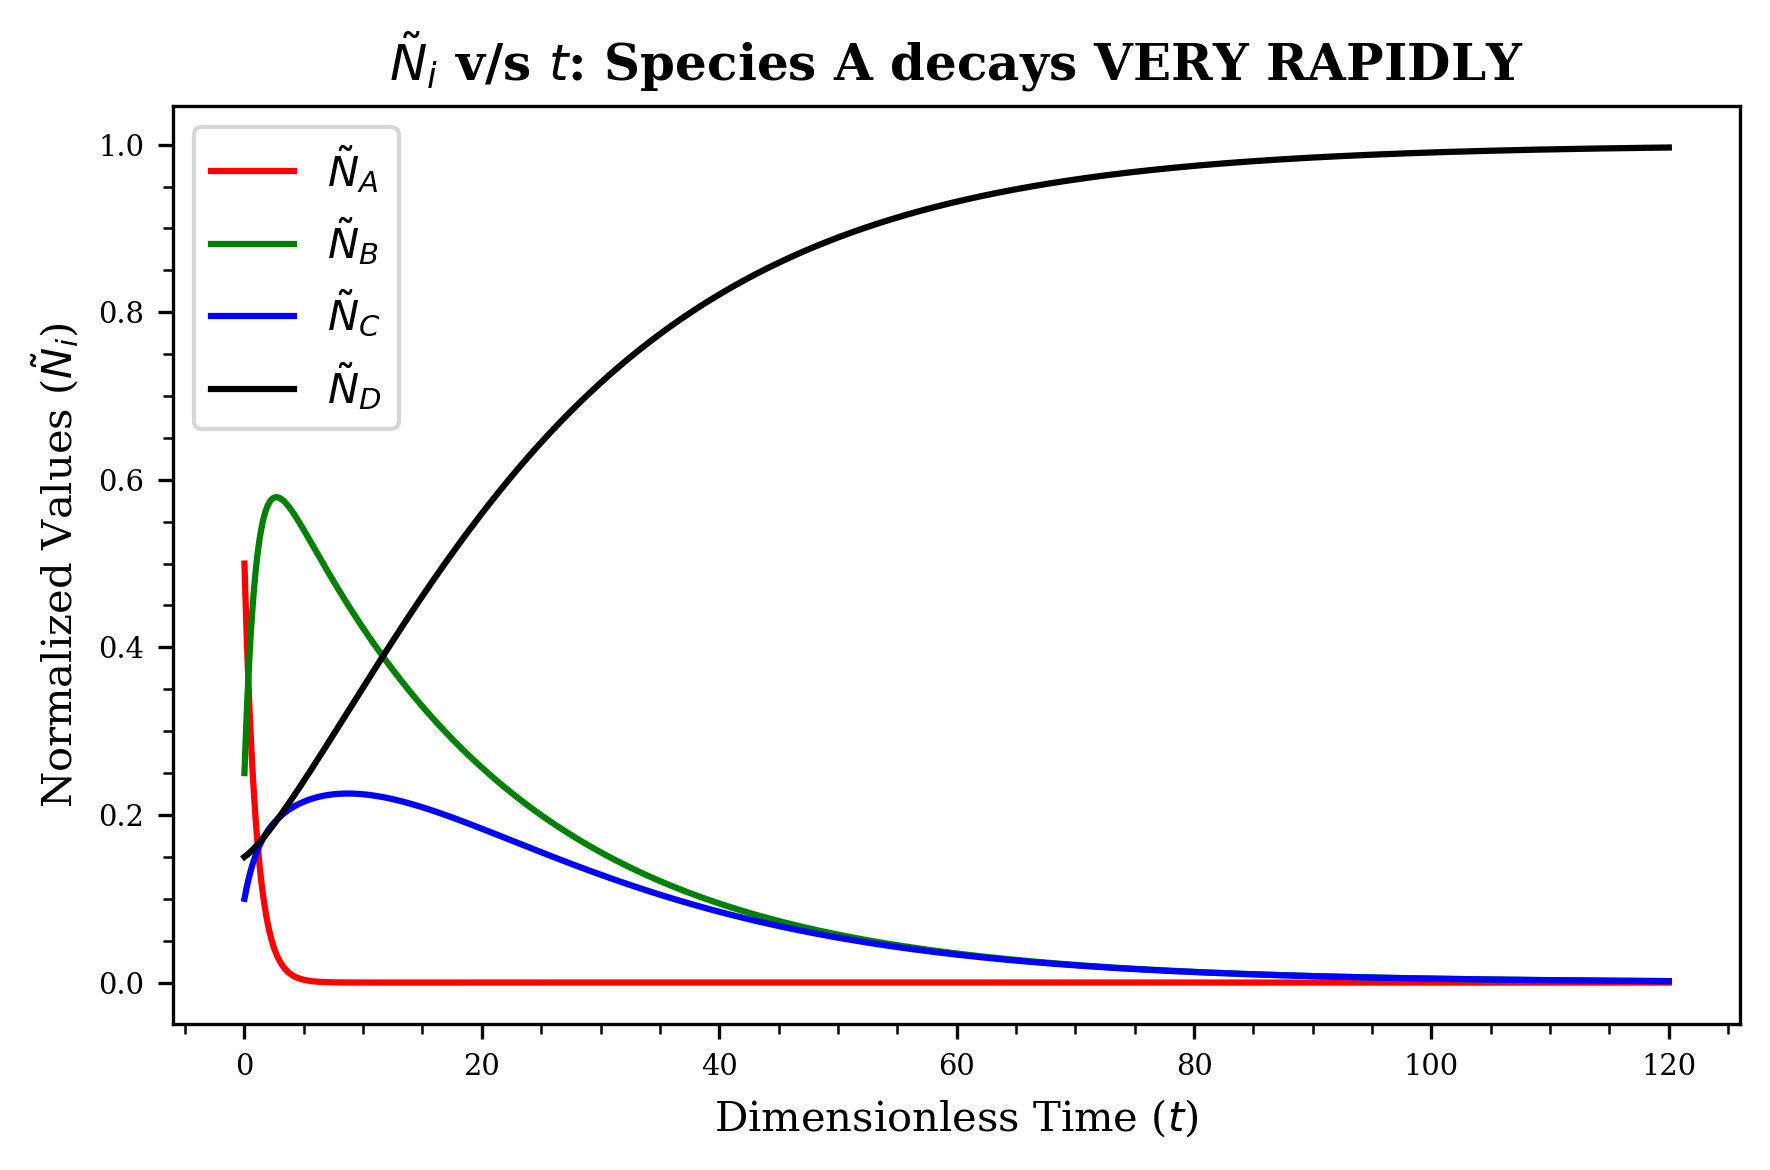

In [17]:
# Plot Normalized Values v/s Dimensionless Time
f,a = plt.subplots()
a.plot(t,y[:,0],'r', label=r'$\tilde N_{A}$')
a.plot(t,y[:,1],'g', label=r'$\tilde N_{B}$')
a.plot(t,y[:,2],'b', label=r'$\tilde N_{C}$')
a.plot(t,y[:,3],'k', label=r'$\tilde N_{D}$')    
a.set_xlabel(r'Dimensionless Time ($t$)')
a.set_ylabel(r'Normalized Values ($\tilde N_{i}$)')
a.set_title(r'$\tilde N_{i}$ v/s $t$: Species A decays VERY RAPIDLY', fontweight='bold')
a.xaxis.set_minor_locator(AutoMinorLocator()) 
a.yaxis.set_minor_locator(AutoMinorLocator())
a.tick_params(which='minor', length=2.5, color='k')
a.legend()
plt.tight_layout()
plt.show()

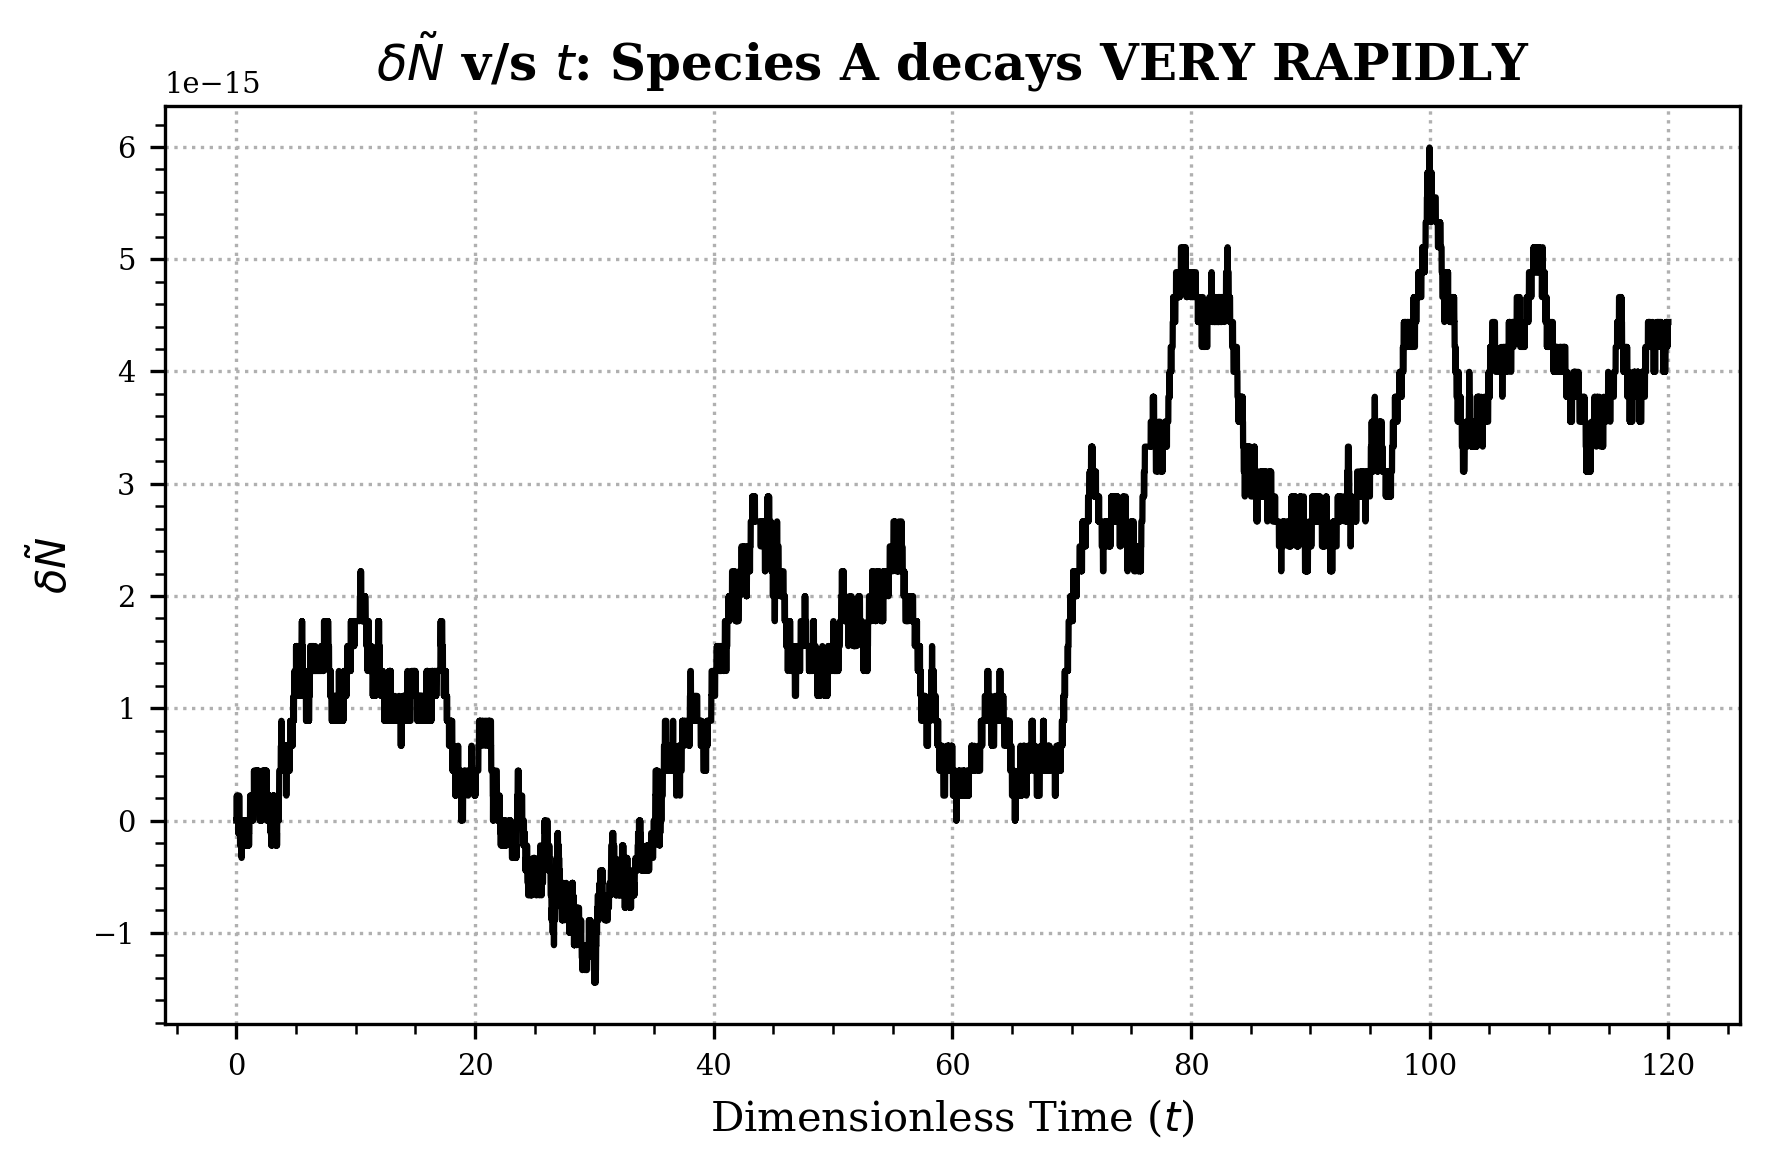

In [47]:
# Plot dN v/s Dimensionless Time
f,a = plt.subplots()
a.plot(t,Ne,'k')    
a.set_xlabel(r'Dimensionless Time ($t$)')
a.set_ylabel(r'$\delta \tilde N$')
a.set_title(r'$\delta \tilde N$ v/s $t$: Species A decays VERY RAPIDLY', fontweight='bold')
a.xaxis.set_minor_locator(AutoMinorLocator()) 
a.yaxis.set_minor_locator(AutoMinorLocator())
a.tick_params(which='minor', length=2.5, color='k')
a.grid(linestyle=':')
plt.tight_layout()
plt.show()

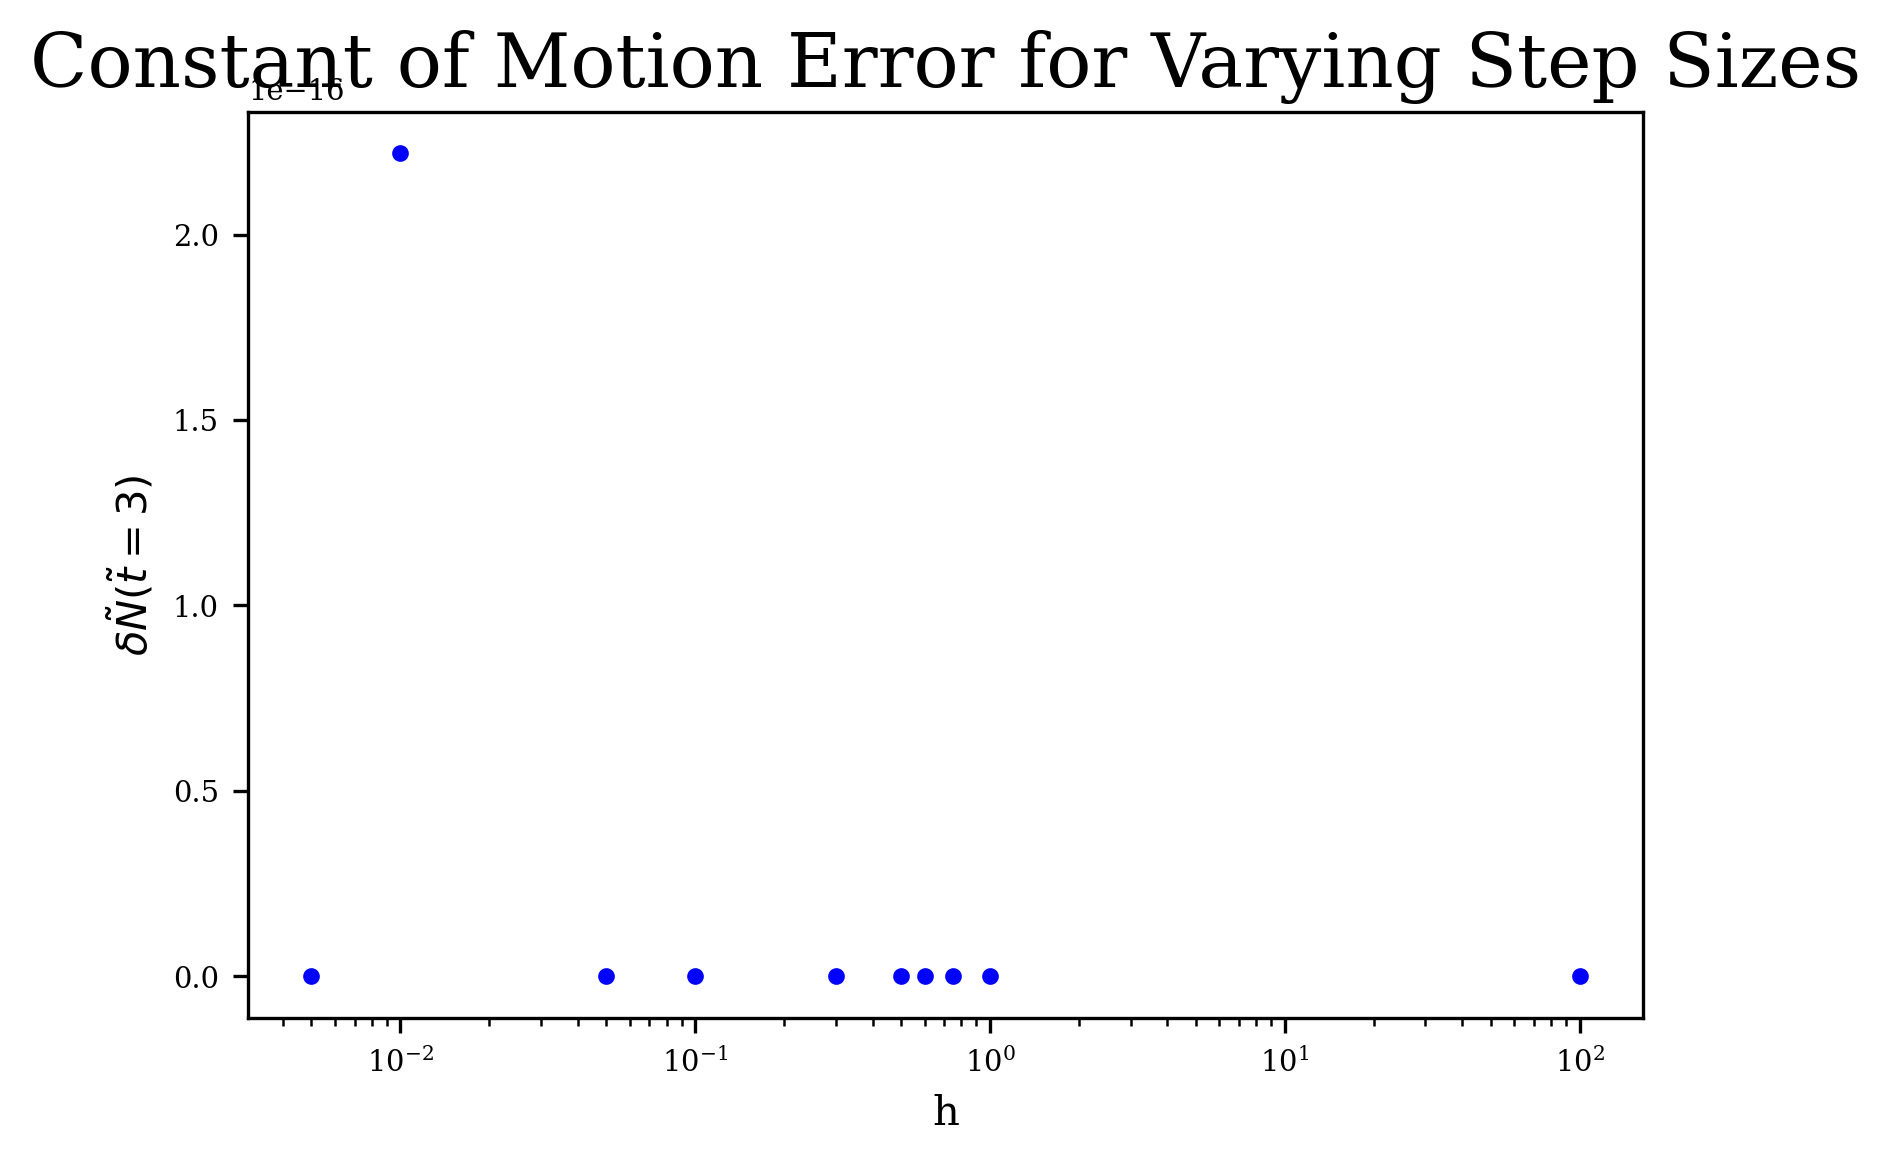

<Figure size 1800x1200 with 0 Axes>

In [54]:
### CONVERGENCE ###

# Initial Conditions
t0 = 0.0
y0 = np.array([0.5, 0.25, 0.1, 0.15])
tmax = 120
h=np.array([1e2,1,0.75,0.6,0.5,0.3,0.1,0.05,0.01,0.005])

# Parameters
lambda_B = 0.05 
lambda_AB = 0.85
lambda_C = 0.1 
lambda_AC = 0.15

# Solve the IVP and dN Analysis
for i in range(len(h)):
    t,y = odeSolve(t0, y0, tmax, h[i], nuclear_species_RHS, RK4, lambda_B, lambda_AB, lambda_C, lambda_AC)
    Nm = np.array([y[:,0],y[:,1],y[:,2],y[:,3]])
    N = Nm.sum(axis=0)
    Ne = N - 1

f,a = plt.subplots()
a.plot(h[0],Ne[int(3.0/h[0])],'b.')
a.plot(h[1],Ne[int(3.0/h[1])],'b.')
a.plot(h[2],Ne[int(3.0/h[2])],'b.')
a.plot(h[3],Ne[int(3.0/h[3])],'b.')
a.plot(h[4],Ne[int(3.0/h[4])],'b.')
a.plot(h[5],Ne[int(3.0/h[5])],'b.')
a.plot(h[6],Ne[int(3.0/h[6])],'b.')
a.plot(h[7],Ne[int(3.0/h[7])],'b.')
a.plot(h[8],Ne[int(3.0/h[8])],'b.')
a.plot(h[9],Ne[int(3.0/h[9])],'b.')
a.set_xlabel('h')
a.set_ylabel(r'$\delta\~N(\~t=3)$')
a.set_title('Constant of Motion Error for Varying Step Sizes',fontsize=18)
a.set_xscale('log')
plt.show()
plt.tight_layout()

### CASE 3: Species B remains CONSTANT
***
Third, the system of equations has an "equilibrium" point for the B species, when $\lambda_{B} \tilde N_{B}/ \lambda_{A} = \lambda_{A,B} \tilde N_{b}/\lambda_{A}$, because then $\frac{d\tilde N_{B}}{dt} = 0$, which implies that the number of B species remain constant, and the B decay rate is balanced by the replenishment of B from the decay of A species. You can now study if this "equilibrium" is stable, by considering initial conditions that satisfy it. We will keep the same $\lambda_{A,B}/\lambda_{A}$ = 0.85 and $\lambda_{A,C}/\lambda_{A}$ = 0.15, and initial conditions $\tilde N_{A}$ = 0.5, $\tilde N_{B}$ = 0.25, $\tilde N_{C}$ = 0.1, $\tilde N_{D}$ = 0.15. The condition $\lambda_{B} \tilde N_{B}/ \lambda_{A} = \lambda_{A,B} \tilde N_{b}/\lambda_{A}$ implies $\lambda_{B}/\lambda_{A}$ = 1.7. And set again $\lambda_{C}/\lambda_{A}$ = 0.1. <br>
Show plots of your solution for $\tilde N_{i}$ v/s t.  <br>
**QUESTION:** Does the population of B species remain constant?

In [19]:
# Initial Conditions
t0 = 0.0
y0 = np.array([0.5, 0.25, 0.1, 0.15])
tmax = 60
h = 0.0001

# Parameters
lambda_B = 1.7 
lambda_AB = 0.85
lambda_C = 0.1 
lambda_AC = 0.15

# Solve the IVP
t,y = odeSolve(t0, y0, tmax, h, nuclear_species_RHS, RK4, lambda_B, lambda_AB, lambda_C, lambda_AC)

# dN Analysis
Nm = np.array([y[:,0],y[:,1],y[:,2],y[:,3]])
N = Nm.sum(axis=0)
Ne = N - 1

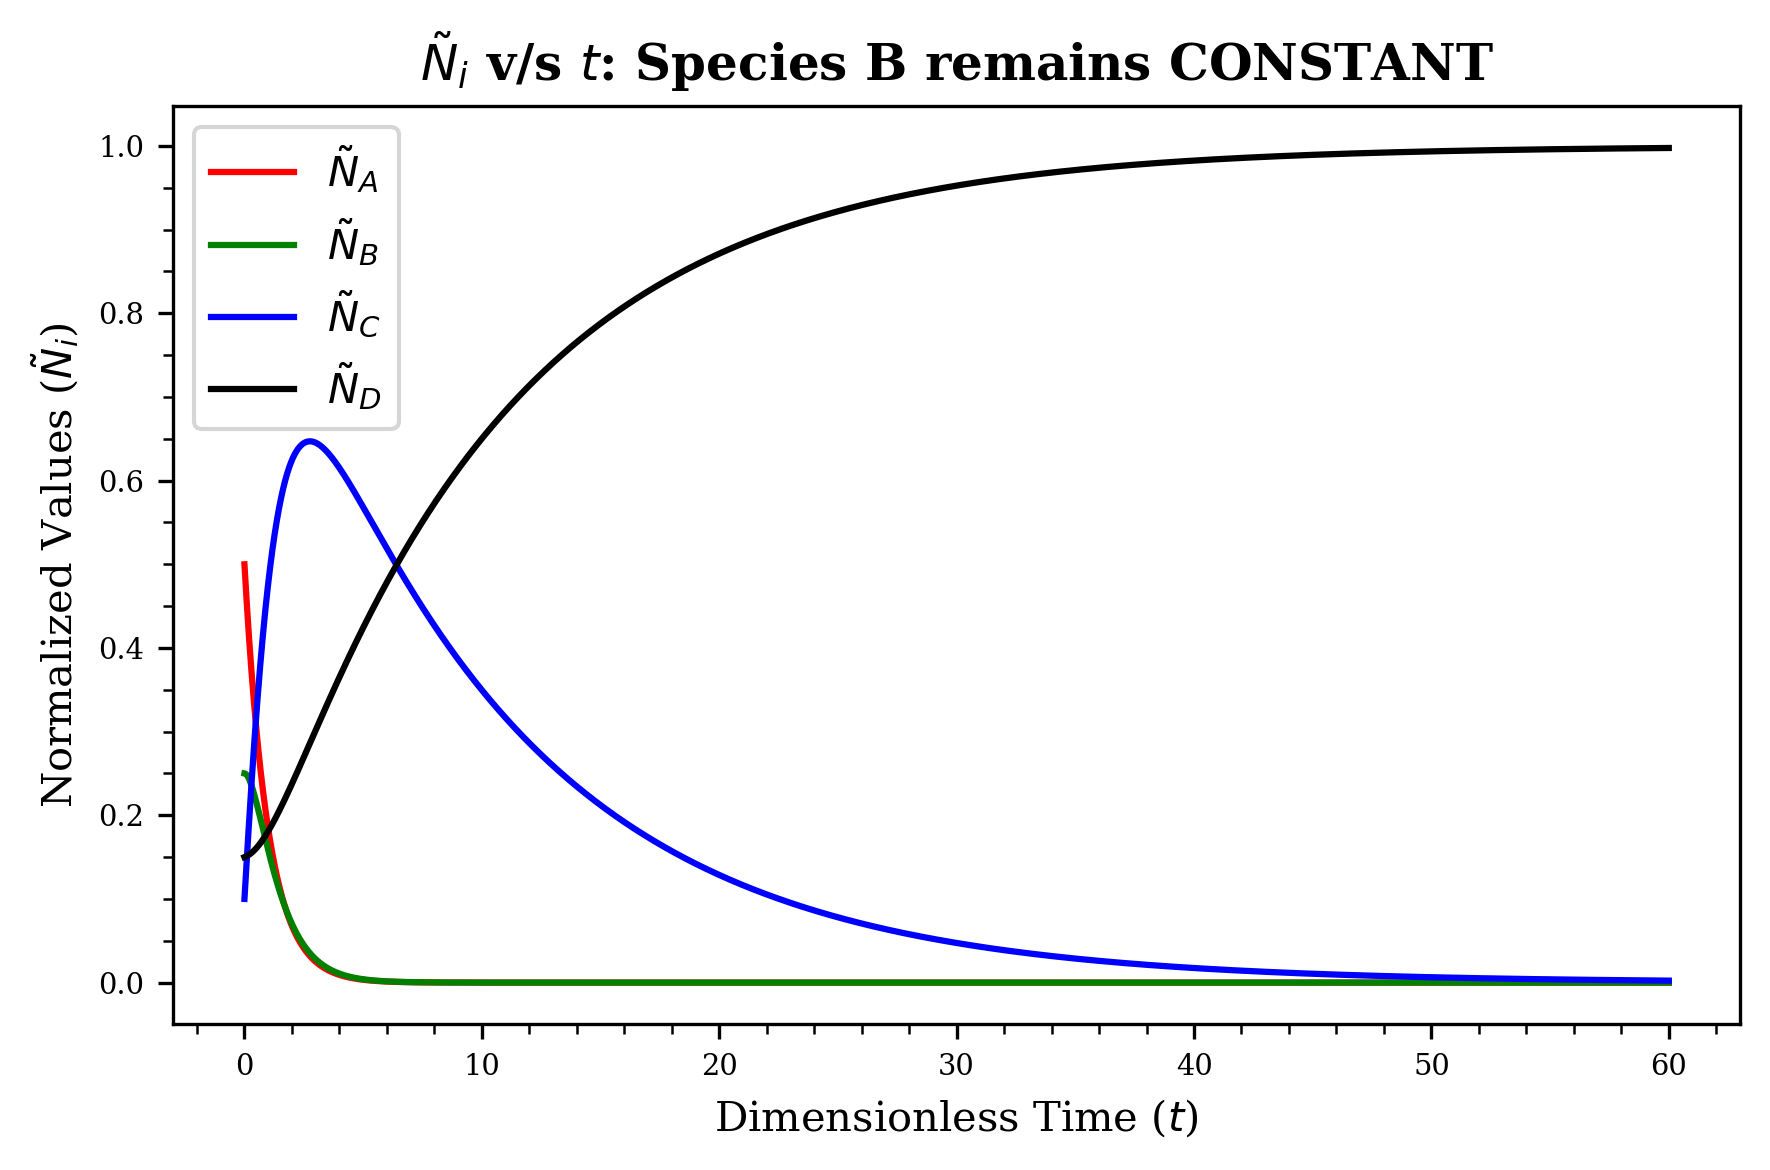

In [20]:
# Plot Normalized Values v/s Dimensionless Time
f,a = plt.subplots()
a.plot(t,y[:,0],'r', label=r'$\tilde N_{A}$')
a.plot(t,y[:,1],'g', label=r'$\tilde N_{B}$')
a.plot(t,y[:,2],'b', label=r'$\tilde N_{C}$')
a.plot(t,y[:,3],'k', label=r'$\tilde N_{D}$')    
a.set_xlabel(r'Dimensionless Time ($t$)')
a.set_ylabel(r'Normalized Values ($\tilde N_{i}$)')
a.set_title(r'$\tilde N_{i}$ v/s $t$: Species B remains CONSTANT', fontweight='bold')
a.xaxis.set_minor_locator(AutoMinorLocator()) 
a.yaxis.set_minor_locator(AutoMinorLocator())
a.tick_params(which='minor', length=2.5, color='k')
a.legend()
plt.tight_layout()
plt.show()

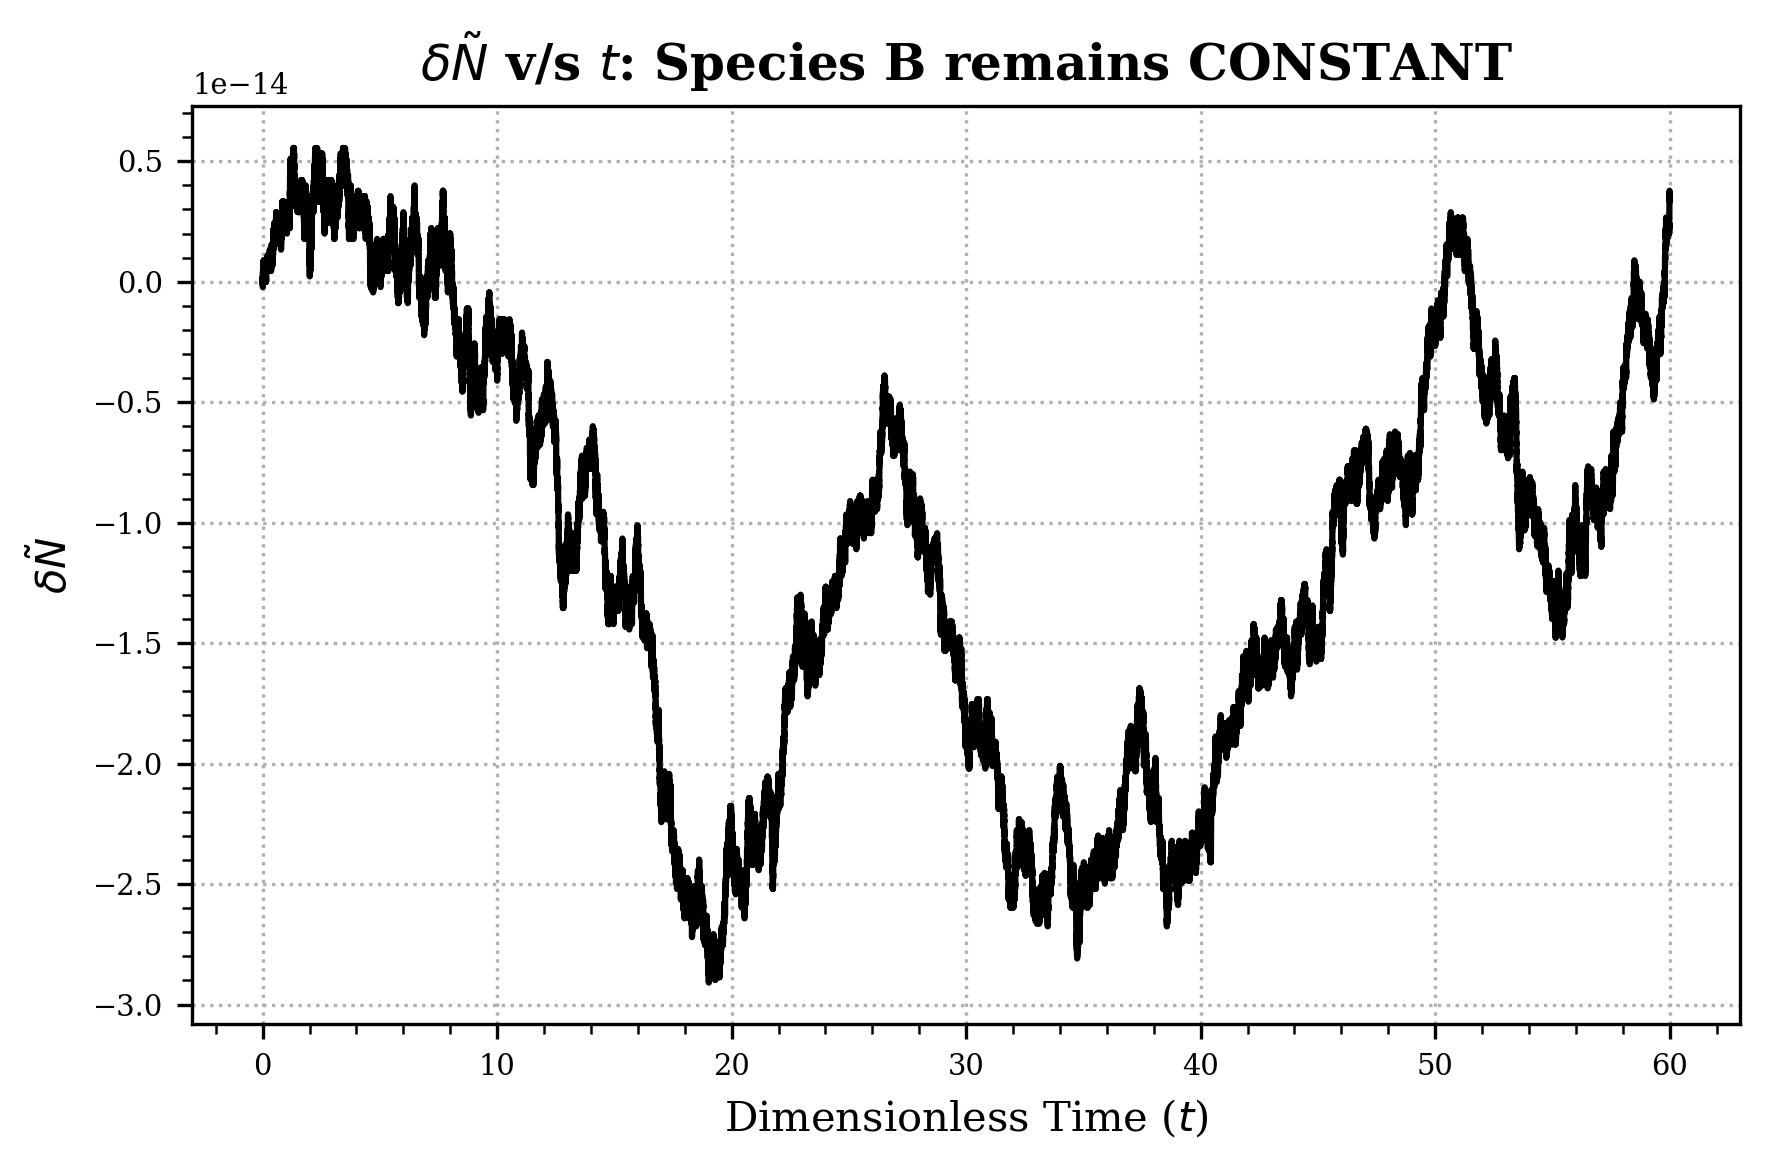

In [21]:
# Plot dN v/s Dimensionless Time
f,a = plt.subplots()
a.plot(t,Ne,'k')    
a.set_xlabel(r'Dimensionless Time ($t$)')
a.set_ylabel(r'$\delta \tilde N$')
a.set_title(r'$\delta \tilde N$ v/s $t$: Species B remains CONSTANT', fontweight='bold')
a.xaxis.set_minor_locator(AutoMinorLocator()) 
a.yaxis.set_minor_locator(AutoMinorLocator())
a.tick_params(which='minor', length=2.5, color='k')
a.grid(linestyle=':')
plt.tight_layout()
plt.show()